# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv('/content/b1abb33c4f (1).csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
mediana_idade_por_municipio = sinasc_raw.groupby('munResNome')['IDADEMAE'].median()
print(mediana_idade_por_municipio)

munResNome
Alta Floresta D'Oeste        25.0
Alto Alegre dos Parecis      25.0
Alto Paraíso                 24.0
Alvorada D'Oeste             25.0
Ariquemes                    25.0
Buritis                      25.0
Cabixi                       26.0
Cacaulândia                  25.0
Cacoal                       26.0
Campo Novo de Rondônia       25.0
Candeias do Jamari           25.0
Castanheiras                 27.0
Cerejeiras                   27.0
Chupinguaia                  25.0
Colorado do Oeste            28.0
Corumbiara                   24.0
Costa Marques                23.0
Cujubim                      23.0
Espigão D'Oeste              26.0
Governador Jorge Teixeira    24.0
Guajará-Mirim                24.0
Itapuã do Oeste              26.0
Jaru                         25.0
Ji-Paraná                    26.0
Machadinho D'Oeste           25.0
Ministro Andreazza           28.0
Mirante da Serra             26.0
Monte Negro                  25.0
Município ignorado - RO      24.0
Nov

In [ ]:
maior_mediana_idade = mediana_idade_por_municipio.idxmax()
print(f"O município com a maior mediana de idade das mães é: {maior_mediana_idade}")

O município com a maior mediana de idade das mães é: Colorado do Oeste


In [ ]:
menor_mediana_idade = mediana_idade_por_municipio.idxmin()
print(f"O município com a menor mediana de idade das mães é: {menor_mediana_idade}")

O município com a menor mediana de idade das mães é: Costa Marques


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
sinasc_raw = pd.DataFrame(sinasc_raw)
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')
result = sinasc_raw.groupby('faixa_latitude').agg({'munResLat': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(2)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
print(result)

                 Média  Mínimo  Máximo  Mediana  Desvio Padrão  Variância
faixa_latitude                                                           
Abaixo de -10.5 -11.61  -13.50  -10.57   -11.53           0.74       0.55
Acima de -10.5   -9.24  -10.44   -8.77    -8.77           0.64       0.41


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
sinasc_raw['faixa_area'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')
result = sinasc_raw.groupby('faixa_area').agg({'munResArea': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(2)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
result

,Média,Mínimo,Máximo,Mediana,Desvio Padrão,Variância
faixa_area,,,,,,
Abaixo de 3000,1851.92,459.98,2944.13,1758.46,709.88,5.039353e+05
Acima de 3000,17778.22,3029.19,34096.39,10959.77,13554.20,1.837162e+08


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500']
sinasc_raw['faixa_altura'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels)
result = sinasc_raw.groupby('faixa_altura').agg({'munResAlt': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(2)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
result

<ipython-input-8-9cc5a78cbc6a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_raw.groupby('faixa_altura').agg({'munResAlt': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(2)


,Média,Mínimo,Máximo,Mediana,Desvio Padrão,Variância
faixa_altura,,,,,,
0-100,87.07,85.0,99.0,87.0,1.38,1.91
101-200,158.06,111.0,197.0,157.0,18.81,353.99
201-300,243.35,202.0,296.0,252.0,20.70,428.35
301-400,351.78,338.0,397.0,338.0,24.43,596.89
401-500,419.00,419.0,419.0,419.0,0.00,0.00


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [ ]:
#4 - Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
media_idade = sinasc_raw.groupby(['DTNASC', 'munResNome'])['IDADEMAE'].mean().unstack()
media_idade

munResNome,Alta Floresta D'Oeste,Alto Alegre dos Parecis,Alto Paraíso,Alvorada D'Oeste,Ariquemes,Buritis,Cabixi,Cacaulândia,Cacoal,Campo Novo de Rondônia,...,Seringueiras,São Felipe D'Oeste,São Francisco do Guaporé,São Miguel do Guaporé,Teixeirópolis,Theobroma,Urupá,Vale do Anari,Vale do Paraíso,Vilhena
DTNASC,,,,,,,,,,,,,,,,,,,,,
2019-01-01,27.0,23.0,NaN,NaN,22.000000,NaN,NaN,NaN,18.000000,NaN,...,NaN,NaN,NaN,21.0,NaN,NaN,21.0,25.0,NaN,27.750000
2019-01-02,NaN,25.0,22.75,NaN,26.500000,32.0,NaN,NaN,35.000000,NaN,...,NaN,NaN,37.0,NaN,NaN,NaN,19.0,NaN,19.0,29.875000
2019-01-03,28.0,NaN,NaN,NaN,24.333333,23.0,20.0,NaN,27.285714,NaN,...,NaN,NaN,26.0,NaN,30.0,NaN,NaN,NaN,NaN,23.500000
2019-01-04,25.0,NaN,NaN,NaN,24.666667,21.5,NaN,NaN,23.750000,NaN,...,NaN,NaN,21.5,NaN,28.0,24.0,NaN,NaN,NaN,25.000000
2019-01-05,NaN,NaN,NaN,NaN,23.125000,21.0,NaN,NaN,26.500000,NaN,...,25.000000,NaN,30.5,NaN,NaN,NaN,NaN,NaN,19.0,27.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,22.00,NaN,26.000000,NaN,NaN,22.0,25.222222,25.0,...,24.666667,40.0,NaN,16.0,NaN,NaN,NaN,34.0,NaN,24.000000
2019-12-28,NaN,NaN,21.00,27.0,27.000000,NaN,NaN,NaN,22.400000,NaN,...,NaN,NaN,26.0,26.0,NaN,NaN,19.0,NaN,NaN,17.666667
2019-12-29,20.0,NaN,NaN,NaN,22.333333,24.0,NaN,NaN,22.666667,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,19.0,NaN,NaN,25.500000


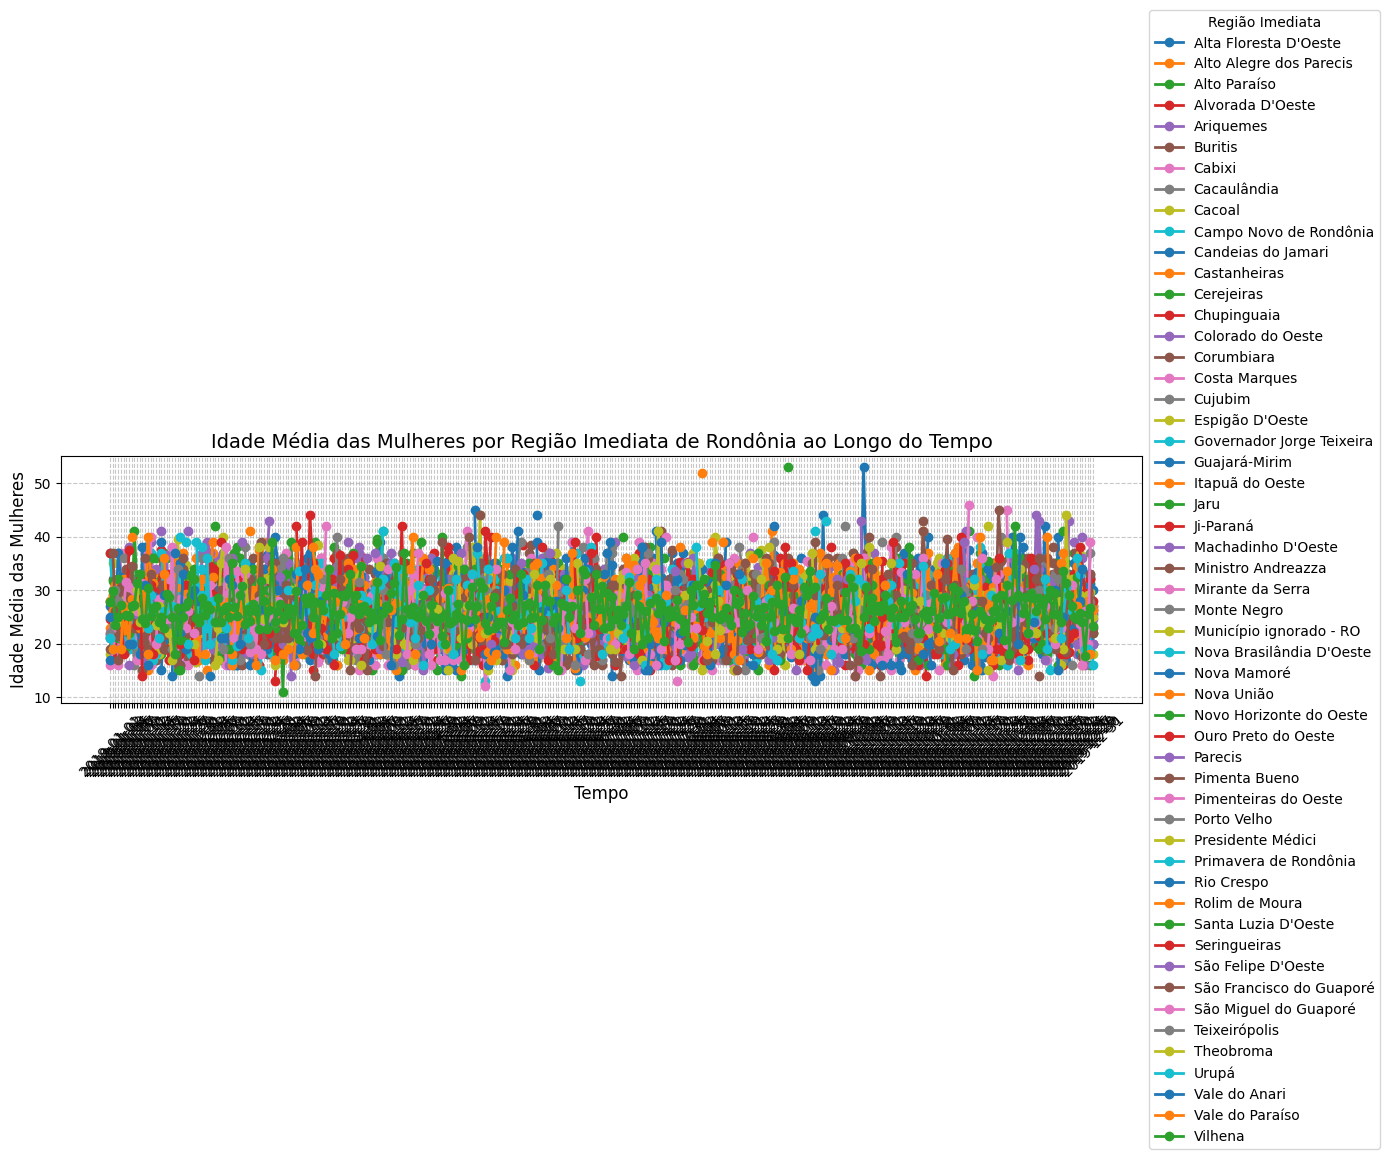

In [ ]:
plt.figure(figsize=(14, 8))
for coluna in media_idade.columns:
    plt.plot(
        media_idade.index,
        media_idade[coluna],
        label=coluna,
        linewidth=2,
        marker='o',
        linestyle='-',
    )
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Idade Média das Mulheres', fontsize=12)
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo', fontsize=14)
plt.legend(title='Região Imediata', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [ ]:
# Dados fornecidos
data = {
    'Município': ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura',
                  'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', 'Espigão d\'Oeste',
                  'Santa Luzia d\'Oeste', 'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras',
                  'Guajará-Mirim', 'Chupinguaia', 'Cabixi', 'Candeias do Jamari', 'São Felipe d\'Oeste',
                  'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra', 'Alvorada d\'Oeste', 'Teixeirópolis',
                  'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste',
                  'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso', 'Parecis',
                  'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé',
                  'Urupá', 'Monte Negro', 'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste',
                  'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré',
                  'Vale do Anari'],
    'IDH_M': [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700,
              0.692, 0.689, 0.685, 0.682, 0.672,
              0.670, 0.665, 0.664, 0.658,
              0.657, 0.652, 0.650, 0.649, 0.649,
              0.646, 0.646, 0.643, 0.643, 0.643,
              0.643, 0.643, 0.641, 0.641,
              0.638, 0.634, 0.627, 0.625, 0.617,
              0.616, 0.614, 0.613, 0.612, 0.611, 0.611,
              0.609, 0.607, 0.598, 0.596, 0.596,
              0.593, 0.592, 0.589, 0.587, 0.587,
              0.584],
    'VAR7': [100, 150, 200, 250, 300, 350, 400,
             450, 500, 550, 600, 650,
             700, 750, 800, 850,
             900, 950, 1000, 1050, 1100,
             1150, 1200, 1250, 1300, 1350,
             1400, 1450, 1500, 1550,
             1600, 1650, 1700, 1750, 1800,
             1850, 1900, 1950, 2000, 2050, 2100,
             2150, 2200, 2250, 2300, 2350,
             2400, 2450, 2500, 2550, 2600,
             2650],
    'VAR8': [200, 250, 300, 350, 400, 450, 500,
             550, 600, 650, 700, 750,
             800, 850, 900, 950,
             1000, 1050, 1100, 1150, 1200,
             1250, 1300, 1350, 1400, 1450,
             1500, 1550, 1600, 1650,
             1700, 1750, 1800, 1850, 1900,
             1950, 2000, 2050, 2100, 2150, 2200,
             2250, 2300, 2350, 2400, 2450,
             2500, 2550, 2600, 2650, 2700,
             2750]
}
sinasc_raw = pd.DataFrame(data)
bins = [0, 0.6, 0.7, 0.8]
labels = ['Baixo', 'Médio', 'Alto']
sinasc_raw['faixa_idh'] = pd.cut(sinasc_raw['IDH_M'], bins=bins, labels=labels)
result = sinasc_raw.groupby('faixa_idh').agg({'IDH_M': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(3)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
result


<ipython-input-13-3bbd67b52ac5>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_raw.groupby('faixa_idh').agg({'IDH_M': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(3)


,Média,Mínimo,Máximo,Mediana,Desvio Padrão,Variância
faixa_idh,,,,,,
Baixo,0.591,0.584,0.598,0.592,0.005,0.000
Médio,0.645,0.607,0.700,0.643,0.025,0.001
Alto,0.718,0.702,0.736,0.716,0.013,0.000


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
data_ifdm = {
    'Município': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste',
                  'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé', 'Pimenteiras do Oeste', 'Teixeirópolis',
                  'Colorado do Oeste', 'Jaru', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste',
                  'Ouro Preto do Oeste', 'São Francisco do Guaporé', 'Candeias do Jamari', 'São Felipe d\'Oeste',
                  'Presidente Médici', 'Cerejeiras', 'Monte Negro', 'Urupá', 'Espigão d\'Oeste', 'Seringueiras',
                  'Alvorada d\'Oeste', 'Itapuã do Oeste', 'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste',
                  'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 'Vale do Anari', 'Ministro Andreazza',
                  'Costa Marques', 'Nova União', 'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras', 'Theobroma',
                  'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Nova Mamoré', 'Cujubim', 'Alto Alegre dos Parecis',
                  'Governador Jorge Teixeira'],
    'IFDM': [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850,
             0.6785, 0.6766, 0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337,
             0.6261, 0.6214, 0.6199, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922,
             0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.5710,
             0.5657, 0.5626, 0.5571, 0.5541, 0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272,
             0.5084, 0.5055, 0.5046, 0.4562]
}
sinasc_raw = pd.DataFrame(data_ifdm)
bins = [0, 0.6, 0.7, 0.8]
labels = ['Baixo', 'Médio', 'Alto']
sinasc_raw['faixa_ifdm'] = pd.cut(sinasc_raw['IFDM'], bins=bins, labels=labels)
result = sinasc_raw.groupby('faixa_ifdm').agg({'IFDM': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(3)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
result

<ipython-input-14-31169b61bba9>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_raw.groupby('faixa_ifdm').agg({'IFDM': ['mean', 'min', 'max', 'median', 'std', 'var']}).round(3)


,Média,Mínimo,Máximo,Mediana,Desvio Padrão,Variância
faixa_ifdm,,,,,,
Baixo,0.556,0.456,0.597,0.564,0.034,0.001
Médio,0.638,0.601,0.685,0.638,0.026,0.001
Alto,0.735,0.711,0.775,0.732,0.024,0.001


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [ ]:
data_pib = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura',
                  'Pimenta Bueno', 'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho d\'Oeste',
                  'Espigão d\'Oeste', 'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré',
                  'Cerejeiras', 'Alta Floresta d\'Oeste', 'Presidente Médici', 'Cujubim',
                  'Nova Brasilândia d\'Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste',
                  'Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste',
                  'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras',
                  'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia d\'Oeste',
                  'Novo Horizonte do Oeste', 'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia', 'Cabixi',
                  'Vale do Anari', 'Nova União', 'Parecis', 'Rio Crespo', 'Pimenteiras do Oeste',
                  'Teixeirópolis', 'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia'],
    'PIB_2019': [17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877, 893000, 834000,
                 726000, 633000, 625000, 616000, 548000, 529000, 507000, 496000, 428000, 385000,
                 360000, 358000, 353000, 335000, 219152, 213410, 208821, 204098, 190331, 188218,
                 174633, 172143, 171878, 169429, 163955, 148027, 140601, 135934, 129399, 129351,
                 116742, 116635, 113031, 105208, 92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908]
}
sinasc_raw = pd.DataFrame(data_pib)
bins = [0, 500000, 1000000, 2000000, 3000000, 20000000]
labels = ['Até 500 Milhões', '500 Milhões - 1 Bilhão', '1 Bilhão - 2 Bilhões', '2 Bilhões - 3 Bilhões', 'Acima de 3 Bilhões']
sinasc_raw['faixa_PIB'] = pd.cut(sinasc_raw['PIB_2019'], bins=bins, labels=labels, right=False)
result = sinasc_raw.groupby('faixa_PIB').agg({
    'PIB_2019': ['mean', 'min', 'max', 'median', 'std', 'var']
}).round(3)
result.columns = result.columns.droplevel(0)
result.columns = ['Média', 'Mínimo', 'Máximo', 'Mediana', 'Desvio Padrão', 'Variância']
print(result)


                               Média   Mínimo    Máximo     Mediana  \
faixa_PIB                                                             
Até 500 Milhões         1.859877e+05    52908    496000    163955.0   
500 Milhões - 1 Bilhão  6.567778e+05   507000    893000    625000.0   
1 Bilhão - 2 Bilhões    1.316400e+06  1164877   1500890   1283434.0   
2 Bilhões - 3 Bilhões   2.557550e+06  2261644   2831175   2579830.0   
Acima de 3 Bilhões      1.084802e+07  3783972  17912070  10848021.0   

                        Desvio Padrão     Variância  
faixa_PIB                                            
Até 500 Milhões            114454.286  1.309978e+10  
500 Milhões - 1 Bilhão     135014.608  1.822894e+10  
1 Bilhão - 2 Bilhões       170414.989  2.904127e+10  
2 Bilhões - 3 Bilhões      285418.465  8.146370e+10  
Acima de 3 Bilhões        9990073.901  9.980158e+13  


<ipython-input-15-5de765e50501>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_raw.groupby('faixa_PIB').agg({


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Pode-se observar que a idade mediana das mães dos múnicipios com menores pibs é menor em municipios como Cajubim, onde o pib é baixo e pode-se supor que não há tantas politicas públicas para consientização da gravidez precoce.